In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [2]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# User1.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Among%20Us%20Dataset/User1.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'User1.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100 rows and 13 columns


In [4]:
df1.head(5)

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code
0,12/13/2020 at 1:26:56 am EST,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF
1,12/13/2020 at 1:17:42 am EST,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF
2,12/13/2020 at 12:57:47 am EST,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF
3,12/13/2020 at 12:41:55 am EST,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF
4,12/13/2020 at 12:30:37 am EST,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF


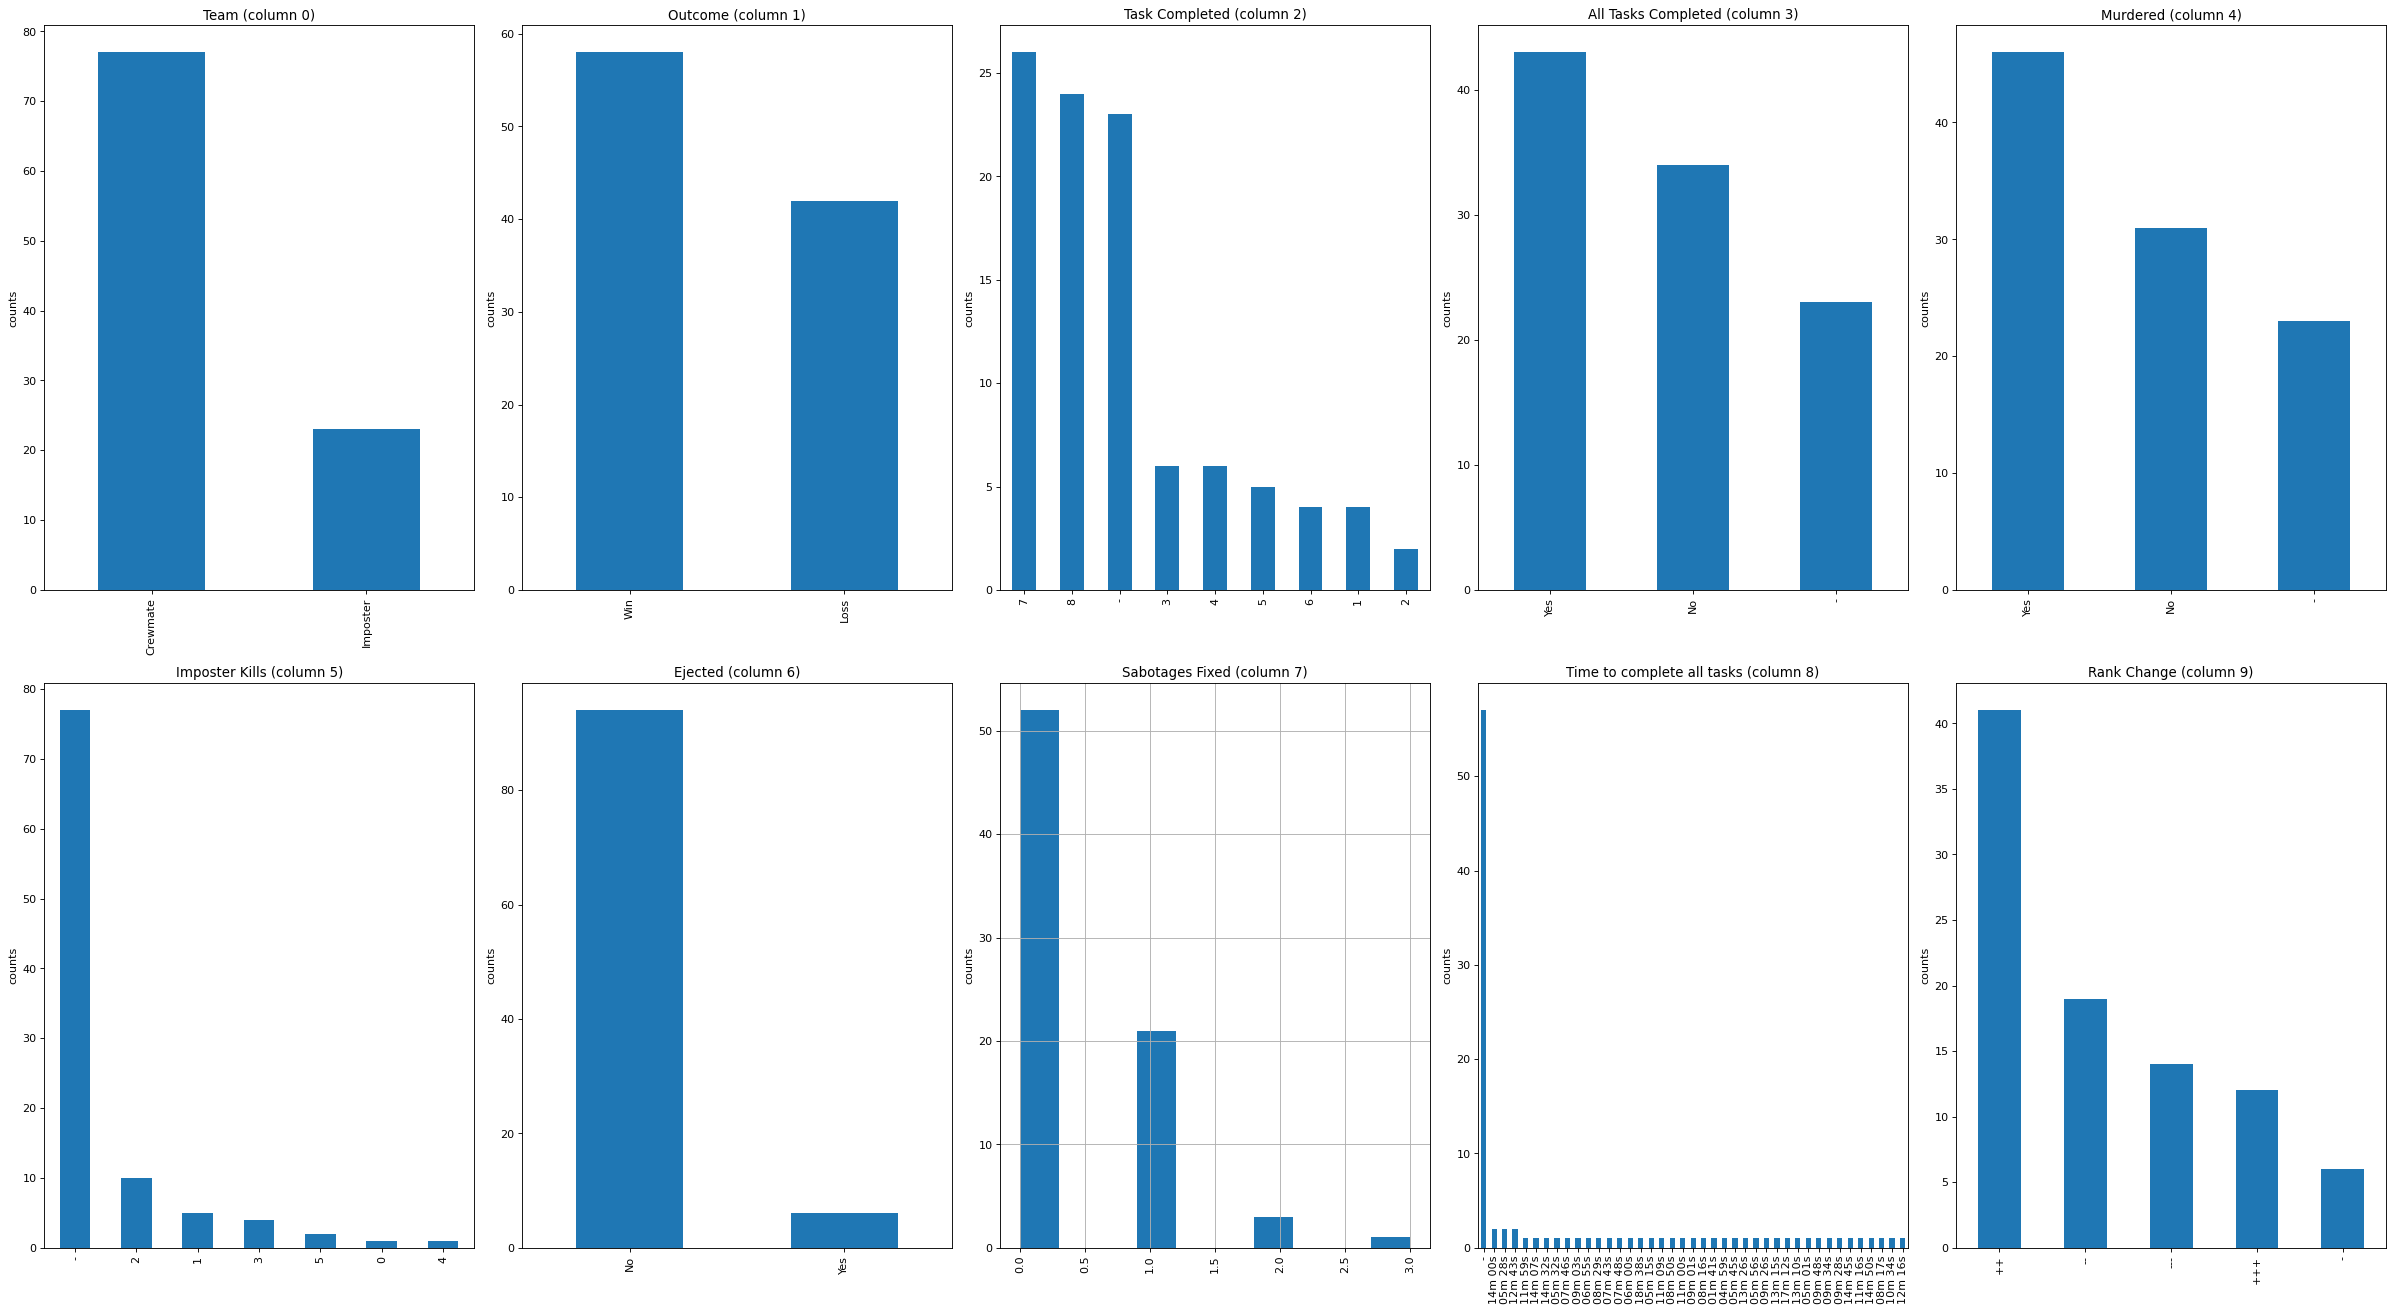

In [5]:
plotPerColumnDistribution(df1, 10, 5)

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# User2.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Among%20Us%20Dataset/User2.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'User2.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100 rows and 13 columns


In [7]:
df2.head(5)

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code
0,12/13/2020 at 1:46:30 am EST,Crewmate,Win,4,No,Yes,-,07m 29s,No,2.0,-,++,NA / DBDIJF
1,12/13/2020 at 1:37:06 am EST,Crewmate,Loss,8,Yes,Yes,-,08m 24s,No,1.0,05m 54s,--,NA / DBDIJF
2,12/13/2020 at 1:22:51 am EST,Imposter,Loss,-,-,-,1,14m 26s,No,NaN,-,--,NA / KJYCCF
3,12/13/2020 at 12:57:45 am EST,Crewmate,Win,5,No,No,-,09m 25s,No,1.0,-,++,NA / HZAUGF
4,12/13/2020 at 12:47:41 am EST,Crewmate,Win,9,Yes,Yes,-,15m 41s,No,0.0,11m 42s,++,NA / HZAUGF


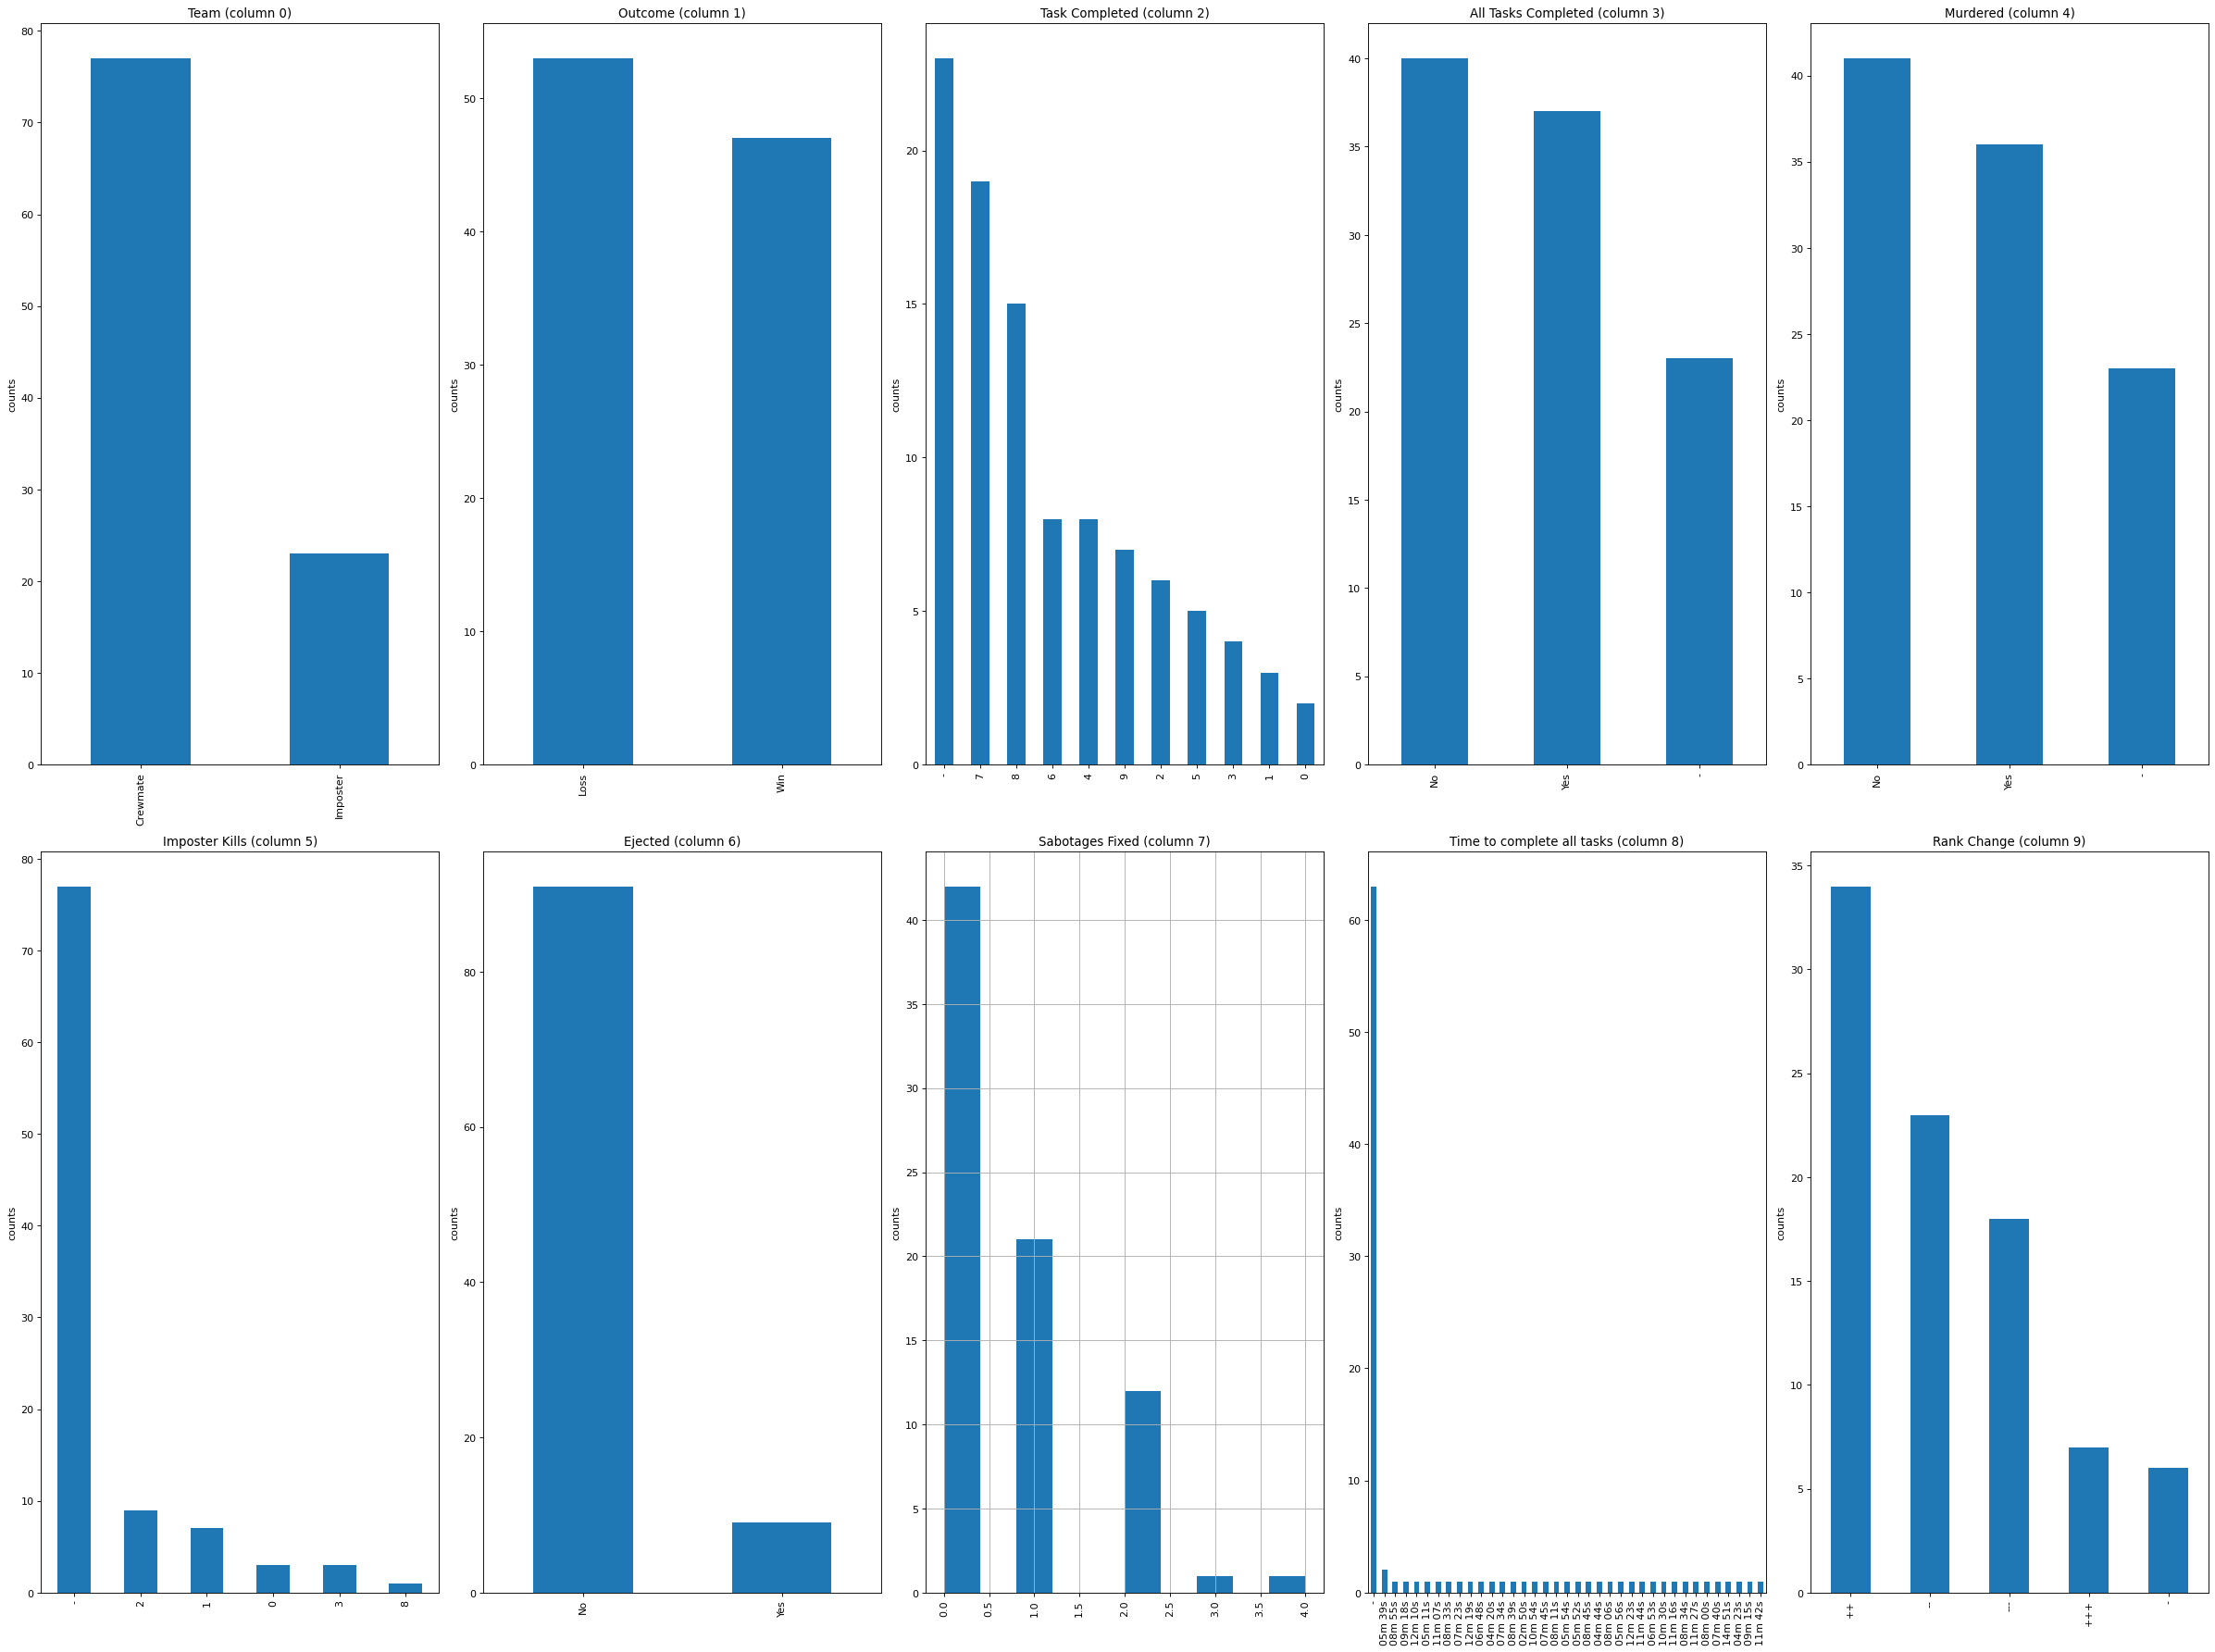

In [8]:
plotPerColumnDistribution(df2, 10, 5)

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# User3.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Among%20Us%20Dataset/User3.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'User3.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 91 rows and 13 columns


In [10]:
df3.head(5)

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code
0,12/13/2020 at 1:47:10 am EST,Imposter,Win,-,-,-,2,03m 21s,No,NaN,-,NaN,NA / SEOHXQ
1,12/13/2020 at 1:43:34 am EST,Crewmate,Win,1,No,No,-,03m 46s,No,0.0,-,NaN,NA / SEOHXQ
2,12/13/2020 at 1:39:23 am EST,Crewmate,Win,1,No,No,-,01m 47s,No,0.0,-,NaN,NA / SEOHXQ
3,12/13/2020 at 1:33:27 am EST,Crewmate,Loss,6,No,Yes,-,07m 10s,No,1.0,-,---,NA / QQULHF
4,12/13/2020 at 1:21:08 am EST,Crewmate,Win,7,No,No,-,19m 17s,No,0.0,-,++,NA / QQULHF


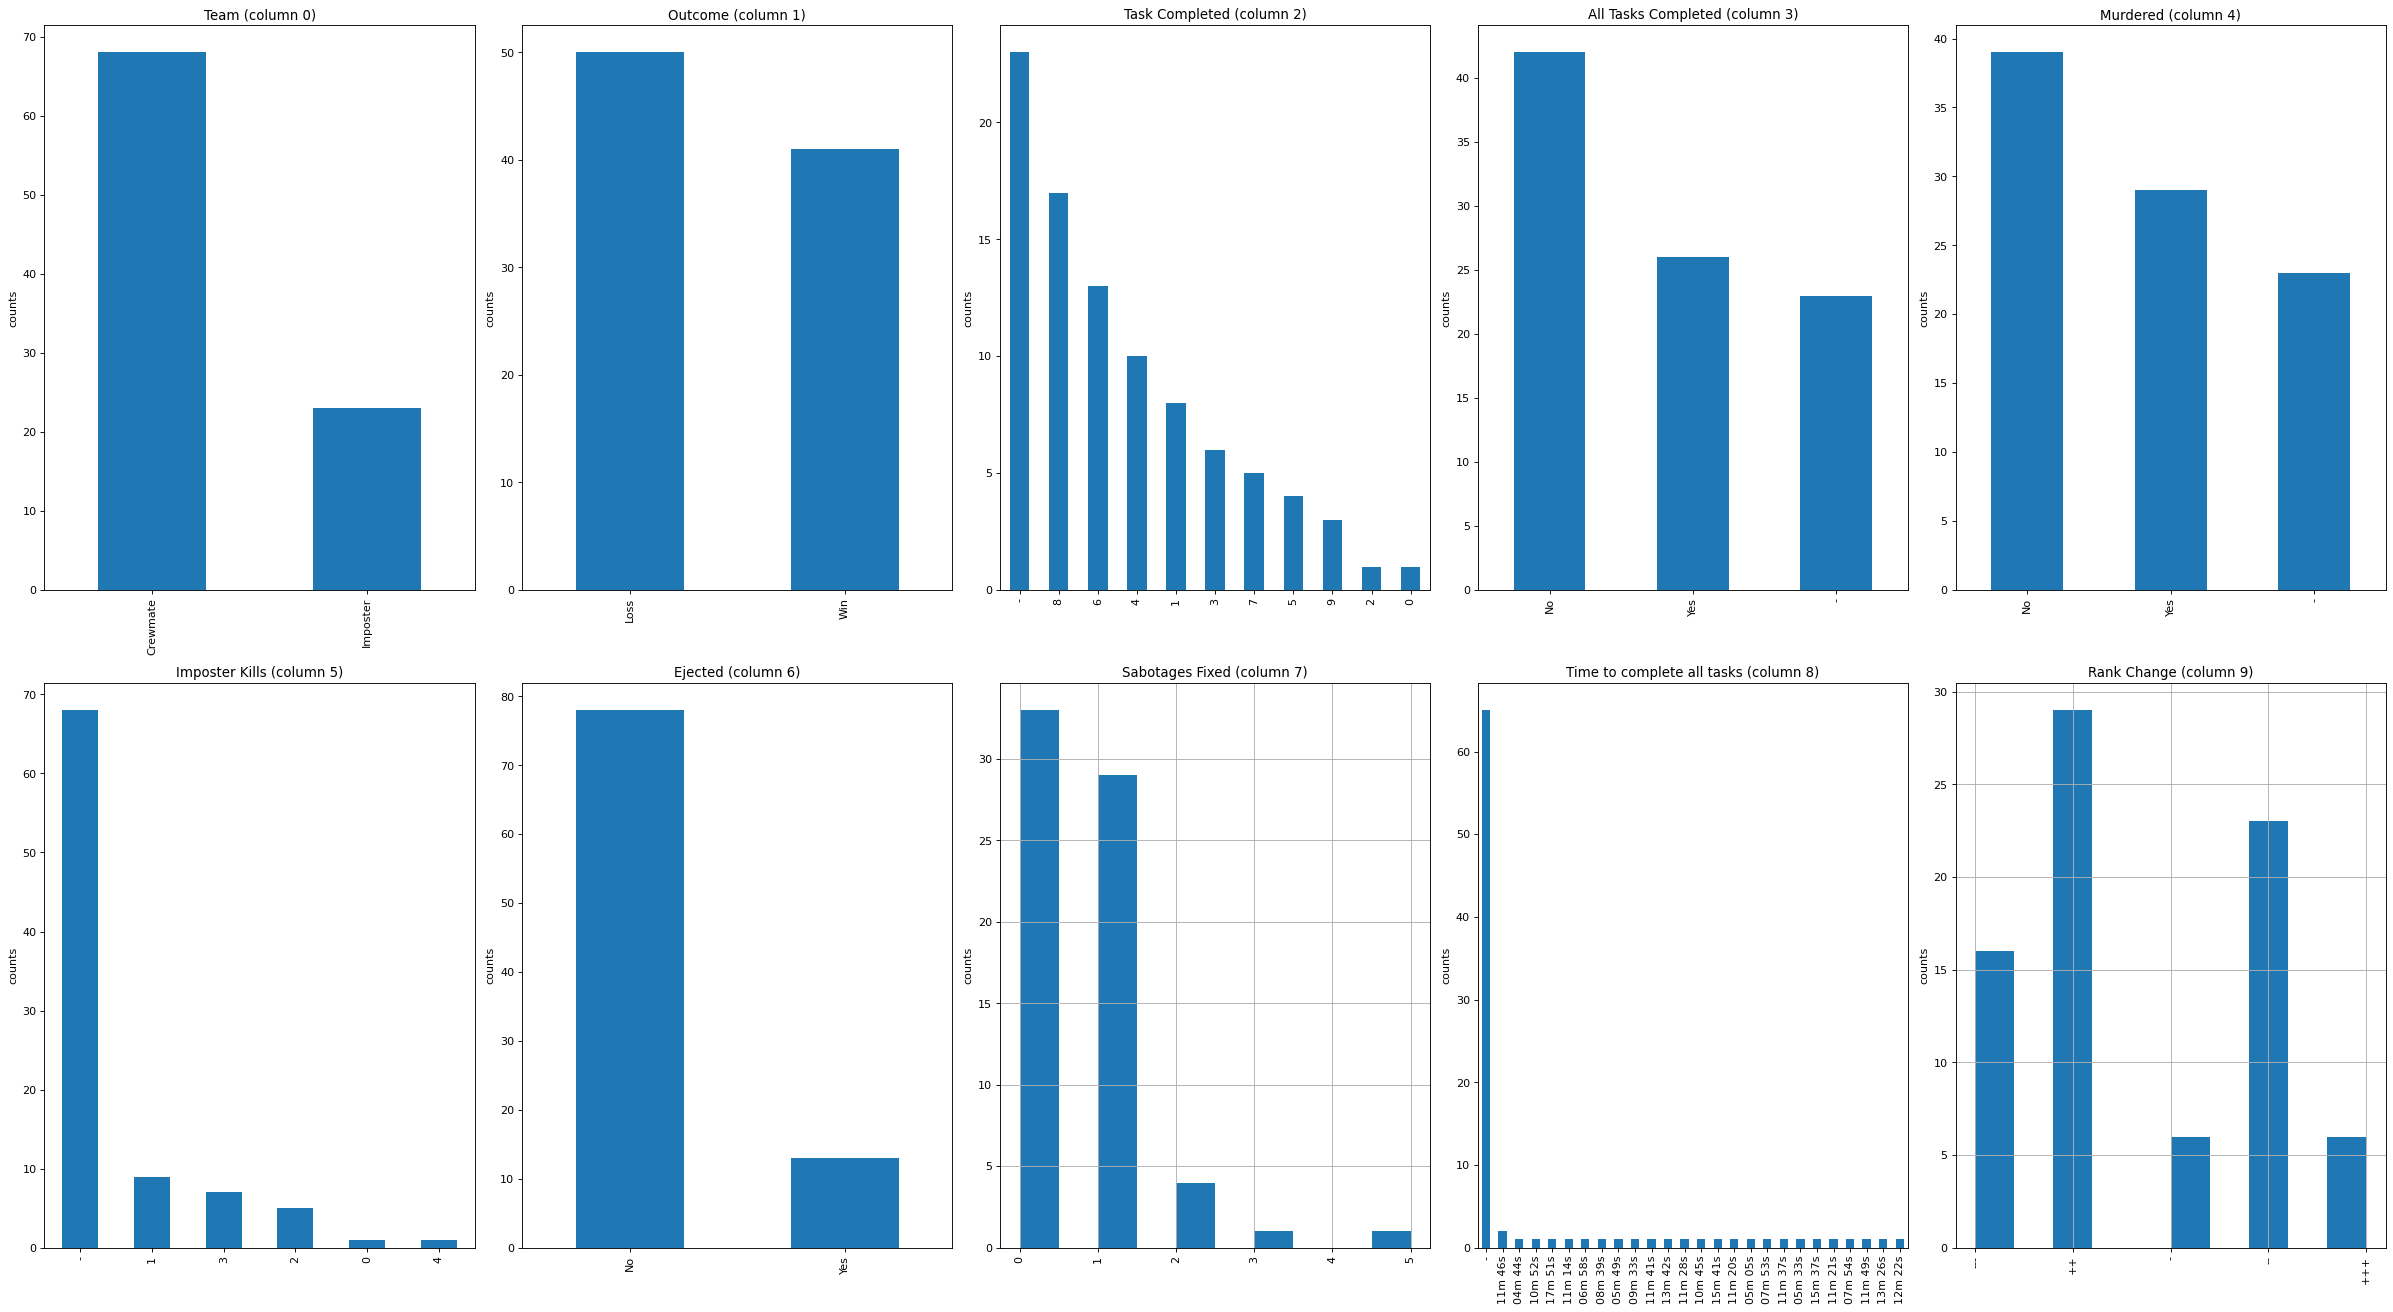

In [11]:
plotPerColumnDistribution(df3, 10, 5)